In [2]:
import requests

# these are the image text pairs

url1='http://farm3.staticflickr.com/2519/4126738647_cc436c111b_z.jpg'
cap1='A motorcycle sits parked across from a herd of livestock'

url2='http://farm3.staticflickr.com/2046/2003879022_1b4b466d1d_z.jpg'
cap2='Motorcycle on platform to be worked on in garage'

url3='http://farm1.staticflickr.com/133/356148800_9bf03b6116_z.jpg'
cap3='a cat laying down stretched out near a laptop'

cap4 = 'Two pillows lying on the sofa'

img1 = {
  'flickr_url': url1,
  'caption': cap1,
  'image_path' : r'images\Img1.png'
}

img2 = {
    'flickr_url': url2,
    'caption': cap2,
    'image_path' : r'images\Img2.png'
}

img3 = {
    'flickr_url' : url3,
    'caption': cap3,
    'image_path' : r'images\Img3.png'
}

img4 = {
    'caption' : cap4,
    'image_path' : r'images\Img4.png'
}

# # download images
imgs = [img1, img2, img3, img4]
# for img in imgs:
#     data = requests.get(img['flickr_url']).content
#     with open(img['image_path'], 'wb') as f:
#         f.write(data)

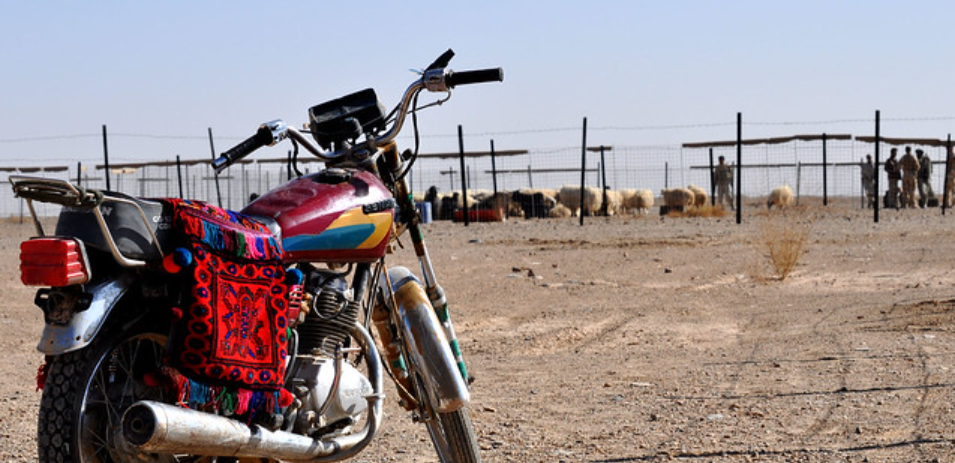

'A motorcycle sits parked across from a herd of livestock'

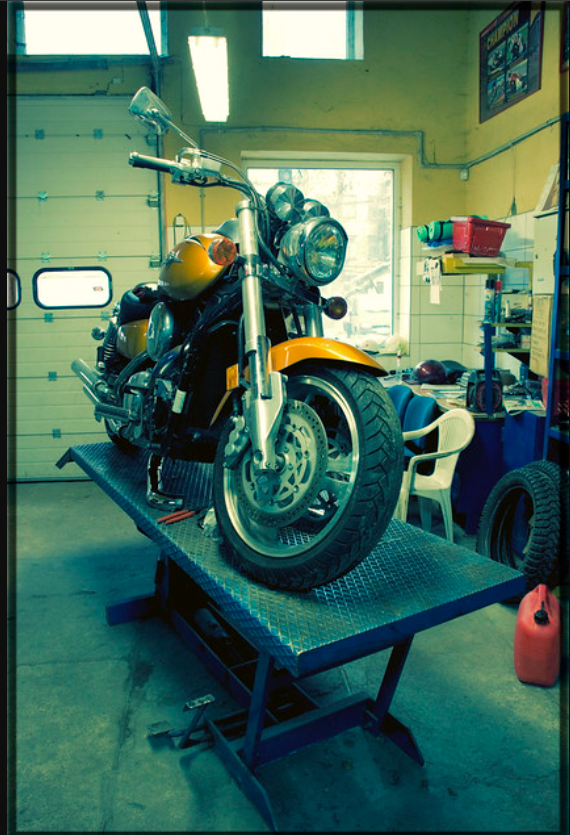

'Motorcycle on platform to be worked on in garage'

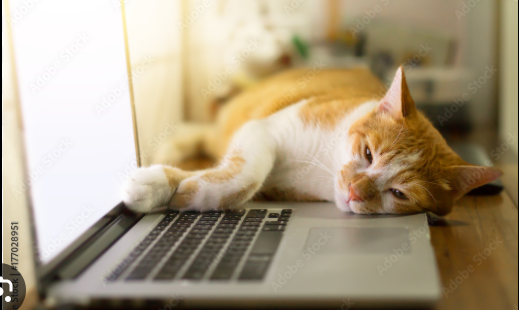

'a cat laying down stretched out near a laptop'

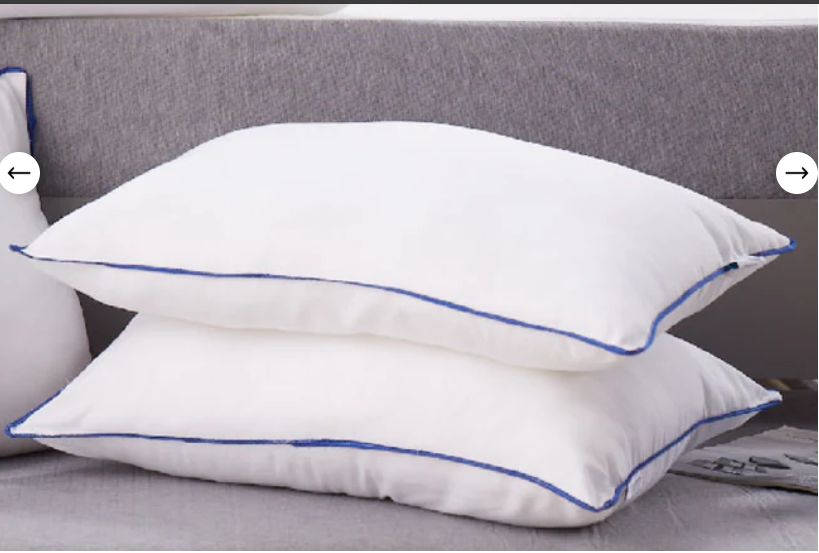

'Two pillows lying on the sofa'

In [3]:
from PIL import Image
from IPython.display import display

for img in [img1, img2, img3, img4]:
    image = Image.open(img['image_path'])
    caption = img['caption']
    display(image)
    display(caption)
    print()


In [4]:
import json
import os
import numpy as np
from numpy.linalg import norm
import cv2
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from tqdm import tqdm
from utils import encode_image
from utils import bt_embedding_from_prediction_guard as bt_embeddings

d:\Multimodal RAG\embedding\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


BridgeTowerConfig {
  "_attn_implementation_autoset": true,
  "contrastive_hidden_size": 512,
  "drop_rate": 0.1,
  "head_hidden_scale": 2,
  "hidden_act": "gelu",
  "hidden_size": 1024,
  "init_layernorm_from_vision_encoder": false,
  "initializer_factor": 1,
  "layer_norm_eps": 1e-05,
  "link_tower_type": "add",
  "logit_scale_init_value": 2.6592,
  "model_type": "bridgetower",
  "num_attention_heads": 16,
  "num_hidden_layers": 6,
  "share_cross_modal_transformer_layers": true,
  "share_link_tower_layers": false,
  "text_config": {
    "_attn_implementation_autoset": true,
    "architectures": [
      "BridgeTowerTextModel"
    ],
    "attention_probs_dropout_prob": 0.1,
    "classifier_dropout": null,
    "hidden_act": "gelu",
    "hidden_dropout_prob": 0.1,
    "hidden_size": 1024,
    "initializer_factor": 1,
    "initializer_range": 0.02,
    "intermediate_size": 4096,
    "layer_norm_eps": 1e-05,
    "max_position_embeddings": 514,
    "model_type": "bridgetower_text_model",
  

Taking out the embeddings by using the bridge tower model

In [3]:
from utils import bt_embedding_from_prediction_guard, encode_image

# Test text-only
text = "A motorcycle sits parked across from a herd of livestock"
text_embedding = bt_embedding_from_prediction_guard(text, None)
print(f"Text-only embedding size: {len(text_embedding)}")

# Test image-text (replace with a real image path)
image_path = r"images\Img1.png"
base64_img = encode_image(image_path)
image_text_embedding = bt_embedding_from_prediction_guard(text, base64_img)
print(f"Image-text embedding size: {len(image_text_embedding)}")

Output keys (text-only): odict_keys(['last_hidden_state', 'pooler_output'])
Pooler output shape (text-only): torch.Size([1, 1024])
Embedding shape after squeeze (text-only): (1024,)
Text-only embedding size: 1024
Embedding shape after squeeze: (2048,)
Image-text embedding size: 2048


In [5]:
embeddings = []
for img in [img1, img2, img3, img4]:
    img_path = img['image_path']
    caption = img['caption']
    base64_img = encode_image(img_path)
    embedding = bt_embeddings(caption, base64_img)
    embeddings.append(embedding)

Output keys: odict_keys(['text_features', 'image_features', 'pooler_output'])
Pooler output shape: torch.Size([1, 2048])
Embedding shape after squeeze: (2048,)
Output keys: odict_keys(['text_features', 'image_features', 'pooler_output'])
Pooler output shape: torch.Size([1, 2048])
Embedding shape after squeeze: (2048,)
Output keys: odict_keys(['text_features', 'image_features', 'pooler_output'])
Pooler output shape: torch.Size([1, 2048])
Embedding shape after squeeze: (2048,)
Output keys: odict_keys(['text_features', 'image_features', 'pooler_output'])
Pooler output shape: torch.Size([1, 2048])
Embedding shape after squeeze: (2048,)


In [6]:
print(len(embeddings[0]))

2048


Getting the cosine similarity b/w the embeddings

In [7]:
def cosine_similarity(vec1, vec2):
    similarity = np.dot(vec1,vec2)/(norm(vec1)*norm(vec2))
    return similarity

In [8]:
ex1_embed = np.array(embeddings[0])
ex2_embed = np.array(embeddings[1])
ex3_embed = np.array(embeddings[2])
ex4_embed = np.array(embeddings[3])
sim_ex1_ex2 = cosine_similarity(ex1_embed, ex2_embed)
sim_ex1_ex4 = cosine_similarity(ex1_embed, ex4_embed)

In [10]:
print("Cosine similarity between ex1_embeded and ex2_embeded is:")
display(sim_ex1_ex2)
print("Cosine similarity between ex1_embeded and ex3_embeded is:")
display(sim_ex1_ex4)

Cosine similarity between ex1_embeded and ex2_embeded is:


np.float32(0.9269824)

Cosine similarity between ex1_embeded and ex3_embeded is:


np.float32(0.8804809)

In [13]:
dist_ex1_ex2 = cv2.norm(ex1_embed, ex2_embed, cv2.NORM_L2)
dist_ex1_ex4 = cv2.norm(ex1_embed, ex4_embed, cv2.NORM_L2)

print("Euclidean distance between ex1_embeded and ex2_embeded is:")
display(dist_ex1_ex2)

print("Euclidean distance between ex1_embeded and ex3_embeded is:")
display(dist_ex1_ex4)

Euclidean distance between ex1_embeded and ex2_embeded is:


10.277168525398631

Euclidean distance between ex1_embeded and ex3_embeded is:


13.246524797865568